# Segmentation demonstration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from fundus_lesions_toolkit.models import segment, list_models
from fundus_lesions_toolkit.utils.images import open_image
from fundus_lesions_toolkit.utils.visualization import plot_image, plot_image_and_mask
from fundus_lesions_toolkit.constants import DEFAULT_COLORS, LESIONS, Dataset

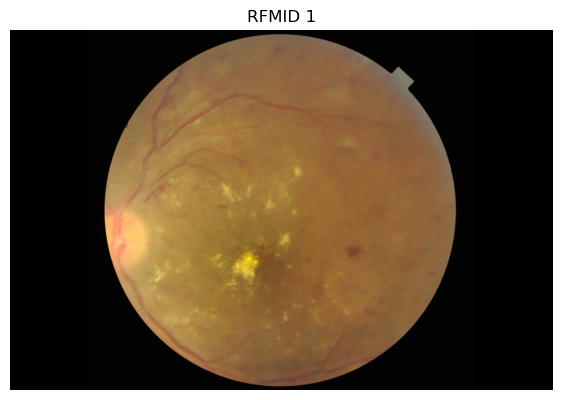

In [3]:
example_path = '../imgs/rfmid_sample_1.png'
img = open_image(example_path)
fsize= (7,7)
plot_image(img, title='RFMID 1', figsize=fsize)

In [4]:
list_models()

Architecture |  Encoder |  Variants
unet seresnext50_32x4d  (31 variants)


/home/clement/Documents/Projets/fundus-lesions-toolkit/src/fundus_lesions_toolkit/models/segmentation.py:196: UserWarning: Setting dropout to 0.2
  warnings.warn(f"Setting dropout to {initial_value}")


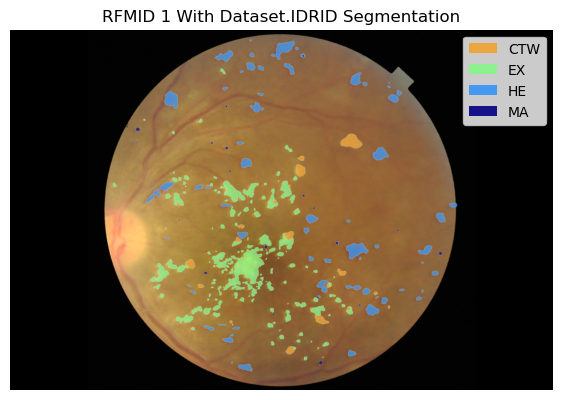

In [5]:
pred = segment(img, device='cuda', train_datasets=Dataset.IDRID, compile=False)
plot_image_and_mask(img, pred, alpha=0.8, title=f'RFMID 1 With {Dataset.IDRID} Segmentation', 
                    figsize=fsize, colors=DEFAULT_COLORS, labels=LESIONS)

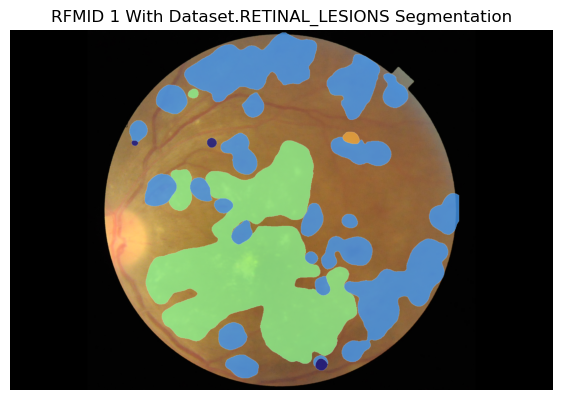

In [6]:
pred = segment(img, device='cuda', train_datasets=Dataset.RETINAL_LESIONS)
plot_image_and_mask(img, pred, alpha=0.8, title=f'RFMID 1 With {Dataset.RETLES} Segmentation', 
                    figsize=fsize, colors=DEFAULT_COLORS) # No legend

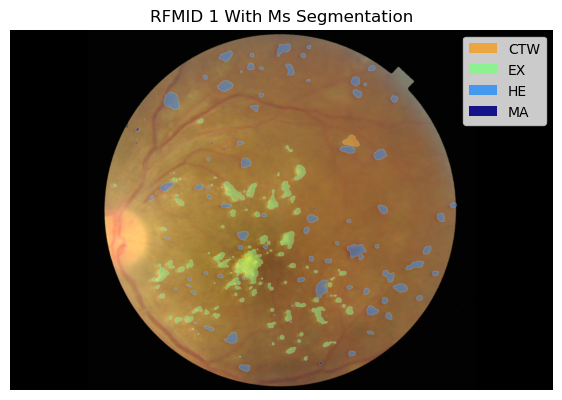

In [7]:
pred = segment(img, device='cuda', train_datasets=Dataset.ALL)
plot_image_and_mask(img, pred, alpha=0.5, title='RFMID 1 With Ms Segmentation', 
                    figsize=fsize, colors=DEFAULT_COLORS, labels=LESIONS)

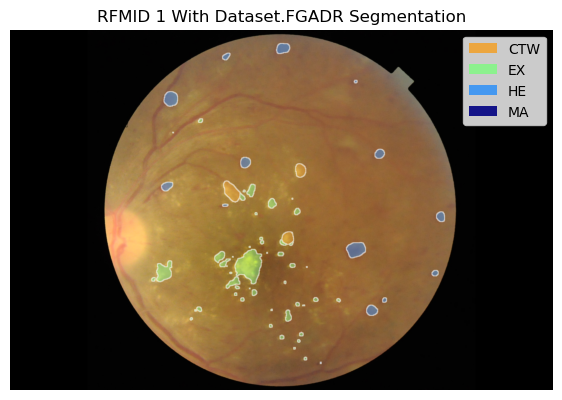

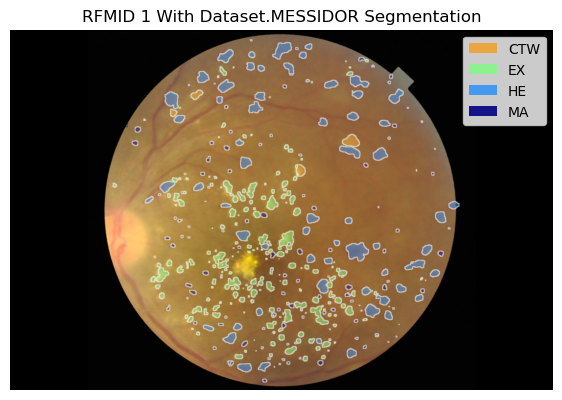

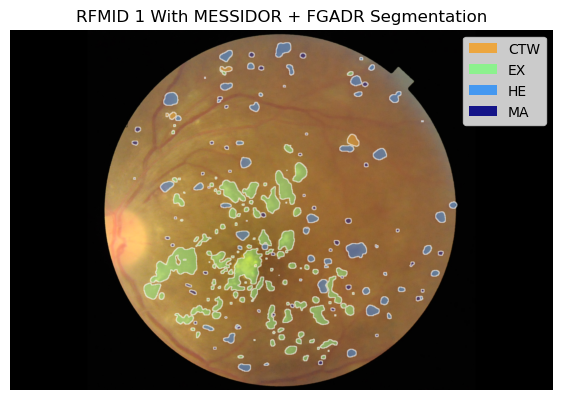

In [8]:

datasets = [Dataset.FGADR, Dataset.MESSIDOR, (Dataset.MESSIDOR, Dataset.FGADR)]
for d in datasets:
    pred = segment(img, device='cuda', train_datasets=d)
    if isinstance(d, tuple):
        d = ' + '.join(d)
    plot_image_and_mask(img, pred, alpha=0.5, title=f'RFMID 1 With {d} Segmentation',
                        kernel_size=5, border_alpha=0.4,
                        figsize=fsize, colors=DEFAULT_COLORS, labels=LESIONS)